<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/reichmann/Session_3_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 3: Keras

### * Intro into Keras

### * CNN using Keras

### * LSTM using Keras

### * Variational Auto encoder using Keras

### * Seq2Seq Model with keras


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


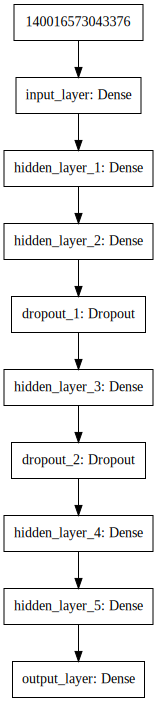

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(16,),name='input_layer'))
#now the model will take as input arrays of shape (*,16)
#and output arrays of shape (*,32)
# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32,name='hidden_layer_1'))
model.add(Dense(100,activation='relu',name='hidden_layer_2'))
model.add(Dropout(0.1))
model.add(Dense(200,activation='sigmoid',name='hidden_layer_3'))
model.add(Dropout(0.1))
model.add(Dense(30,name='hidden_layer_4'))
model.add(Dense(100,name='hidden_layer_5'))

model.add(Dense(32,name='output_layer'))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, (3, 3),
                 input_shape=(3, 32, 32), padding='same',))
model.add(Conv2D(20, (3, 3), padding='same',))
# now: model.output_shape == (None, 64, 32, 32)
# now: model.input_shape == (None, 3, 32, 32)

model.add(Flatten())
# now: model.output_shape == (None, 65536)



from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

display(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 3, 32, 64)         18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 32, 20)         11540     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1920)              0         
Total params: 30,036
Trainable params: 30,036
Non-trainable params: 0
_________________________________________________________________


None

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Scaling from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)    

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#Show summary
print(model.summary())

# Functional keras

In [36]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

# This returns a tensor
inputs_1 = Input(shape=(10,))

# a layer instance is callable on a tensor, and returns a tensor
x_1 = Dense(64, activation='relu')(inputs_1)
x_1 = Dense(64, activation='relu')(x_1)

merged = Concatenate()([x,x_1])

y = Dense(64, activation='relu')(merged)
y = Dense(64, activation='relu')(y)

y_plus_1 = Dense(10, activation='softmax',name='output1')(y)
y_plus_2 = Dense(20, activation='softmax',name='output2')(y)

losses = dict()
losses['output1']='categorical_crossentropy'
losses['output2']='mse'

metrics = dict()
metrics['output1']='acc'
metrics['output2']='mse'

model = Model([inputs,inputs_1],[y_plus_1,y_plus_2])

model.compile(optimizer='adam',loss=losses,metrics=metrics)



from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

import numpy as np
input_1=np.random.rand(1,784)
input_2=np.random.rand(1,10)

output_1,output_2=model.predict([input_1,input_2])
display(output_1.shape)
display(output_2.shape)


(1, 10)

(1, 20)